#### EDA

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [38]:
plt.rc("font", size=12)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

In [39]:
#xl = pd.ExcelFile("cpd merged final v1.xlsx")
data = pd.read_csv("cpd.csv")
#data = xl.parse("cpd merged final")
print(data.shape)

(650, 74)


In [40]:
data['conversion1'].describe( )

count    518.000000
mean       0.774131
std        0.418557
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: conversion1, dtype: float64

In [41]:
print(data.columns)

Index(['Timestamp', '4. ', 'Study ID No.', '6. How old are you? ',
       '7. What is your current job?', 'job type', 'What level? ',
       '8. What is your highest educational attainment? ', 'educ', '9. Sex ',
       'female', '10. Gender Identification ', 'genderid',
       '11. Location (Region) ', 'loc',
       '12. What device(s) are you using to access the social media?',
       'devices', 'devices2',
       '13. What led you in visiting the page? (Choose one)', 'purpose page',
       '14. What is your priority reproductive health need right now? ',
       'perceived rh needs',
       '15. What do you think are the benefits of using family planning?',
       'benefitnum1', 'benefitnum', '16. What platform(s) did you visit? ',
       'platforms1', 'platforms',
       '17. How often do you visit Family Planning and Reproductive Health social media contents? ',
       'oftenvisit',
       '18. How did you learn about CPD and Usap Tayo sa Family Planning FB pages? ',
       'learnpa

#### Touchpoint 1

##### Remove rows with no conversion 1 results

In [42]:
print(data.shape)
data = data.dropna(subset=['conversion1'])
print(data.shape)
cdata1 = pd.DataFrame()     # Dataframe for conversion 1

(650, 74)
(518, 74)


Total respondents at the first conversion: **518**

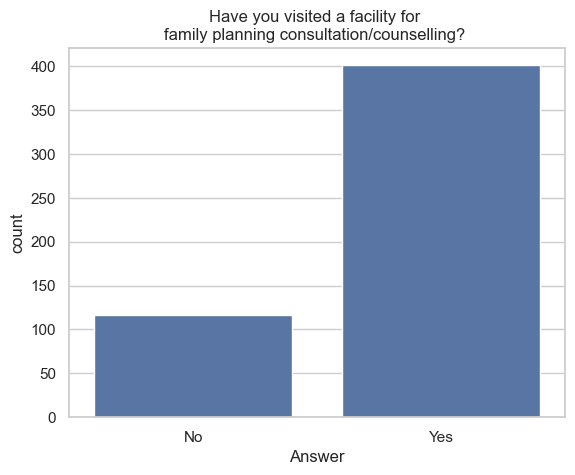

No - 117
Yes - 401


In [43]:
temp = pd.DataFrame()
labels = ['No','Yes']
bins =[0,1,99]
temp['conversion1'] = pd.cut(data['conversion1'], bins=bins, labels=labels, right=False)
sns.countplot(x='conversion1', data=temp)
plt.title(label='Have you visited a facility for \nfamily planning consultation/counselling? ')
plt.xlabel("Answer")
plt.show()

print("No - " + str (((temp['conversion1'] == 'No')).sum() ))
print("Yes - " + str (((temp['conversion1'] == 'Yes')).sum() ))
cdata1['conversion1'] = temp['conversion1']


##### Age

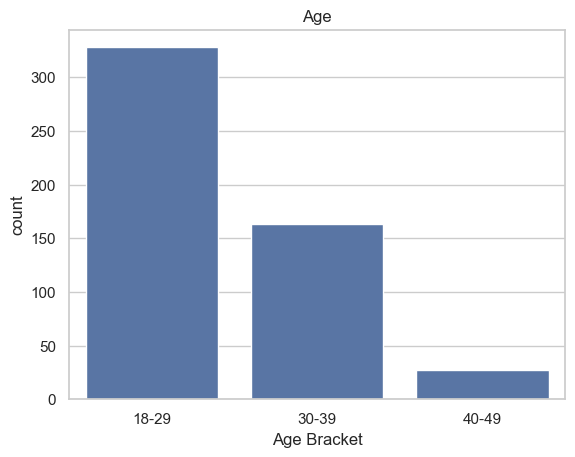

18-29 - 353
30-39 - 144
40-49 - 21


In [44]:

temp = pd.DataFrame()
age_bins =[0,29,39,100]
age_labels = ['18-29','30-39','40-49']
new_age_labels = [0,1,2]
temp['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=age_labels, right=False)
cdata1['age_bracket'] = pd.cut(data['6. How old are you? '], bins=age_bins, labels=new_age_labels, right=False)

sns.countplot(x='age_bracket', data=temp)
plt.title(label='Age')
plt.xlabel("Age Bracket")
plt.show()

print("18-29 - " + str (((data['6. How old are you? '] >= 18) & (data['6. How old are you? '] <= 29)).sum() ))
print("30-39 - " + str (((data['6. How old are you? '] >= 30) & (data['6. How old are you? '] <= 39)).sum() ))
print("40-49 - " + str (((data['6. How old are you? '] >= 40) & (data['6. How old are you? '] <= 49)).sum() ))


##### Gender

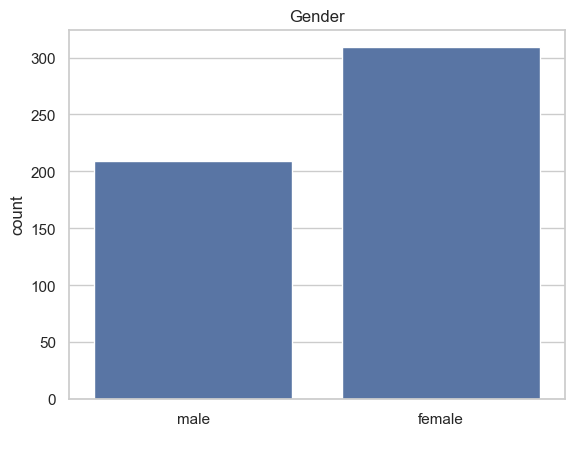

male - 209
female - 309


In [45]:
cdata1['female'] = data['female']
sex_labels = ['male','female']
sex_bins =[0,1,99]
temp['female'] = pd.cut(cdata1['female'], bins=sex_bins, labels=sex_labels, right=False)
sns.countplot(x='female', data=temp)
plt.title(label='Gender')
plt.xlabel(" ")
plt.show()

print("male - " + str (((data['female'] == 0)).sum() ))
print("female - " + str (((data['female'] == 1)).sum() ))


##### Civil Status

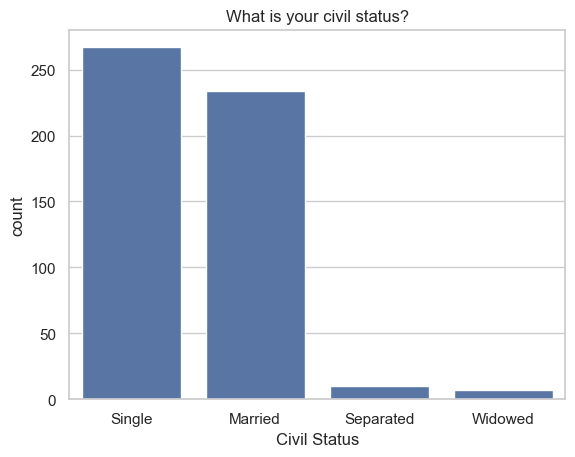

Single - 267
Married - 234
Separated - 10
Widowed - 7


In [46]:
cdata1['civil'] = data['civil']

civil_labels = ['Single','Married','Separated','Widowed']
civil_bins =[1,2,3,4,99]
temp['civil'] = pd.cut(cdata1['civil'], bins=civil_bins, labels=civil_labels, right=False)

sns.countplot(x='civil', data=temp)
plt.title(label='What is your civil status?')
plt.xlabel("Civil Status")
plt.show()
print("Single - " + str (((data['civil'] == 1)).sum() ))
print("Married - " + str (((data['civil'] == 2)).sum() ))
print("Separated - " + str (((data['civil'] == 3)).sum() ))
print("Widowed - " + str (((data['civil'] == 4)).sum() ))

##### Job Type

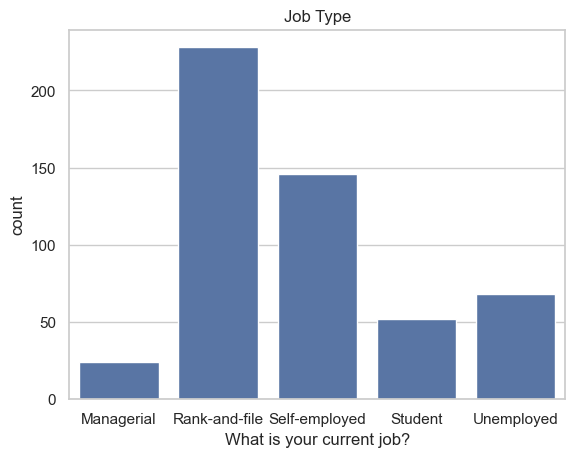

Managerial - 24
Rank-and-file - 228
Self-employed - 146
Student - 52
Unemployed - 68


In [47]:
cdata1['job_type'] = data['job type']

labels = ['Managerial','Rank-and-file','Self-employed',
          'Student','Unemployed']
bins =[1,2,3,4,5,99]
temp['job_type'] = pd.cut(cdata1['job_type'] , bins=bins, labels=labels, right=False)

sns.countplot(x='job_type', data=temp)
plt.title(label='Job Type')
plt.xlabel("What is your current job?")
plt.show()

print("Managerial - " + str (((data['job type'] == 1)).sum() ))
print("Rank-and-file - " + str (((data['job type'] == 2)).sum() ))
print("Self-employed - " + str (((data['job type'] == 3)).sum() ))
print("Student - " + str (((data['job type'] == 4)).sum() ))
print("Unemployed - " + str (((data['job type'] == 5)).sum() ))

##### Results

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

temp['age_bracket'] = label_encoder.fit_transform(cdata1['age_bracket'])
temp['female'] = label_encoder.fit_transform(cdata1['female'])
temp['conversion1'] = label_encoder.fit_transform(cdata1['conversion1'])
temp['civil'] = label_encoder.fit_transform(cdata1['civil'])
temp['job_type'] = label_encoder.fit_transform(cdata1['job_type'])

X = temp[['age_bracket', 'female', 'civil', 'job_type']]
y = temp['conversion1']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nDemographics vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.504210
         Iterations 6


Demographics vs Conversion 1:

                           Logit Regression Results                           
Dep. Variable:            conversion1   No. Observations:                  518
Model:                          Logit   Df Residuals:                      514
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                 0.05620
Time:                        10:18:47   Log-Likelihood:                -261.18
converged:                       True   LL-Null:                       -276.73
Covariance Type:            nonrobust   LLR p-value:                 8.073e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age_bracket    -0.0996      0.175     -0.570      0.569      -0.442      